In [1]:
import cv2                 
import numpy as np         
import os        

from random import shuffle 
from tqdm import tqdm      

In [2]:
# Contains 3000 Non Varying Image

# TRAIN_DIR = '/home/sauradip/Desktop/cnn-tf/data/raw-data/mix'
# TEST_DIR = '/home/sauradip/Desktop/cnn-tf/data/raw-data/mix'

# Contains 5000+ Variation IMages

TRAIN_DIR = '/home/sauradip/Desktop/cnn-tf/data/new data/resized'
TEST_DIR = '/home/sauradip/Desktop/cnn-tf/data/new data/resized'

In [3]:
IMG_SIZE = 100 # Resizing and reshaping 
LR = 1e-3 # Learning Rate is 0.001

In [4]:
MODEL_NAME = 'gesture-{}-{}.model'.format(LR, '7_new_data_conv-basic') # just so we remember which saved model is which, sizes must match

In [5]:
def label_img(img):
    word_label = img[0]
    # conversion to one-hot array [index,v-shape,fist,terminal]
   
    if word_label == 'i': return [1,0,0,0]                            
    elif word_label == 'v': return [0,1,0,0]
    elif word_label == 'f': return [0,0,1,0]
    elif word_label == 't': return [0,0,0,1]

In [6]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path , cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [7]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data


In [12]:
train_data = create_train_data()
# If i have already created the dataset ,i will just load it :
#train_data = np.load('train_data.npy')

100%|██████████| 5758/5758 [03:08<00:00, 30.48it/s]


In [9]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


Instructions for updating:
Use the retry module or similar alternatives.
hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [16]:
# import tensorflow as tf
# tf.reset_default_graph()
# convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

# # 7 Layered CNN Architecture with 5 Convolutional and 2 FC Layer with Dropout and Max Pooling

# convnet = conv_2d(convnet, 32, 5, activation='relu')
# convnet = max_pool_2d(convnet, 5)
# convnet = dropout(convnet, 0.8)

# convnet = conv_2d(convnet, 64, 5, activation='relu')
# convnet = max_pool_2d(convnet, 5)
# convnet = dropout(convnet, 0.8)

# convnet = conv_2d(convnet, 128, 5, activation='relu')
# convnet = max_pool_2d(convnet, 5)
# convnet = dropout(convnet, 0.8)

# convnet = conv_2d(convnet, 256, 5, activation='relu')
# convnet = max_pool_2d(convnet, 5)
# convnet = dropout(convnet, 0.8)

# convnet = conv_2d(convnet, 512, 5, activation='relu')
# convnet = max_pool_2d(convnet, 5)
# convnet = dropout(convnet, 0.8)

# convnet = fully_connected(convnet, 1024, activation='relu')
# convnet = dropout(convnet, 0.8)

# convnet = fully_connected(convnet, 4, activation='softmax')
# convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

# model = tflearn.DNN(convnet, tensorboard_dir='log')

import tensorflow as tf
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

# 7 Layered CNN Architecture with 5 Convolutional and 2 FC Layer with Dropout and Max Pooling

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = dropout(convnet, 0.8)
print(convnet.shape)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = dropout(convnet, 0.8)
print(convnet.shape)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = dropout(convnet, 0.8)
print(convnet.shape)

convnet = conv_2d(convnet, 256, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = dropout(convnet, 0.8)
print(convnet.shape)

convnet = conv_2d(convnet, 512, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = dropout(convnet, 0.8)
print(convnet.shape)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 4, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

(?, 20, 20, 32)
(?, 4, 4, 64)
(?, 1, 1, 128)
(?, 1, 1, 256)
(?, 1, 1, 512)


In [17]:
# train=[]
# test=[]
# train = train_data[:-1500]
# test = train_data[-1500:]

# X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
# Y = [i1[1] for i1 in train]

# test_x = np.array([i2[0] for i2 in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
# test_y = [i3[1] for i3 in test]

# model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
#     snapshot_step=50, show_metric=True, run_id=MODEL_NAME)

# #model.save(MODEL_NAME)
train=[]
test=[]
train = train_data[:-4000]
test = train_data[-1000:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i1[1] for i1 in train]

test_x = np.array([i2[0] for i2 in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i3[1] for i3 in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=15, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=50, show_metric=True, run_id=MODEL_NAME)

#model.save("/home/pallab/gestures-cnn/tfmodels/"+MODEL_NAME)

Training Step: 419  | total loss: 0.54489 | time: 67.452s
| Adam | epoch: 015 | loss: 0.54489 - acc: 0.8223 -- iter: 1728/1758
Training Step: 420  | total loss: 0.52204 | time: 74.675s
| Adam | epoch: 015 | loss: 0.52204 - acc: 0.8275 | val_loss: 0.20328 - val_acc: 0.9510 -- iter: 1758/1758
--


INFO:tensorflow:/home/sauradip/Desktop/cnn-tf/model/gesture-0.001-7_new_data_conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


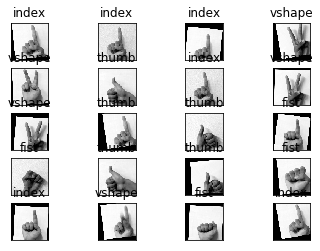

ValueError: multilabel-indicator is not supported

In [24]:
# model.save("/home/sauradip/Desktop/cnn-tf/model/"+MODEL_NAME)
# # import matplotlib.pyplot as plt

# # # if i need to create the data:
# # test_data = process_test_data()
# # # if i already have some saved:
# # #test_data = np.load('test_data.npy')

# # fig=plt.figure()

# # for num,data in enumerate(test_data[:100]):
# #     #[index,v-shape,fist,terminal]
    
# #     img_num = data[1]
# #     img_data = data[0]
    
# #     y = fig.add_subplot(5,20,num+1)
# #     orig = img_data
# #     data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
# #     #model_out = model.predict([data])[0]
# #     model_out = model.predict([data])[0]
    
# #     if np.array_equal((model_out),np.array([1.,0.,0.,0.])):
# #             str_label='Index'
# #     elif np.array_equal((model_out),np.array([0.,1.,0.,0.]) ): 
# #         str_label='V-Shape'
# #     elif np.array_equal((model_out) , np.array([0.,0.,1.,0.])): 
# #         str_label='Fist'
# #     elif np.array_equal((model_out) , np.array([0.,0.,0.,1.])): 
# #         str_label='Terminal'
        
# #     y.imshow(orig,cmap='gray')
# #     plt.title(str_label)
# #     y.axes.get_xaxis().set_visible(False)
# #     y.axes.get_yaxis().set_visible(False)
# # plt.show()
# import matplotlib.pyplot as plt
# # if i need to create the data:
# #test_data = process_test_data()
# # if i already have some saved:
# test_data = np.load('test_data.npy')

# fig=plt.figure()
# labels = np.empty([20, 4])
# predic = np.empty([20, 4])
# for num,data in enumerate(test_data[:20]):
#     #[index,v-shape,fist,terminal]
    
#     img_num = data[1]
#     img_data = data[0]
#     if img_num == "i":
#         labels[num, :] = np.array([1.,0.,0.,0.])
#     elif img_num == "v":
#         labels[num, :] = np.array([0.,1.,0.,0.])
#     elif img_num == "f":
#         labels[num, :] = np.array([0.,0.,1.,0.])
#     elif img_num == "t":
#         labels[num, :] = np.array([0.,0.,0.,1.])
    
#     y = fig.add_subplot(5,4,num+1)
#     orig = img_data
#     data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
#     #model_out = model.predict([data])[0]
#     model_out = (model.predict([data])[0]).round()
#     if np.array_equal((model_out),np.array([1.,0.,0.,0.])):
#         str_label='index'
#     elif np.array_equal((model_out),np.array([0.,1.,0.,0.]) ): 
#         str_label='vshape'
#     elif np.array_equal((model_out) , np.array([0.,0.,1.,0.])): 
#         str_label='fist'
#     elif np.array_equal((model_out) , np.array([0.,0.,0.,1.])): 
#         str_label='thumb'
#     predic[num, :] = model_out
        
#     y.imshow(orig,cmap='gray')
#     plt.title(str_label)
#     y.axes.get_xaxis().set_visible(False)
#     y.axes.get_yaxis().set_visible(False)
# plt.show()

# from sklearn.metrics import confusion_matrix

# precision= confusion_matrix(labels, predic)
# print('Precision of the Model is '+str(precision*100) + ' %')

INFO:tensorflow:/home/sauradip/Desktop/cnn-tf/model/gesture-0.001-7_new_data_conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


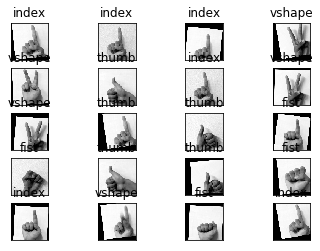

             precision    recall  f1-score   support

          1       1.00      0.75      0.86         8
          2       1.00      1.00      1.00         5
          3       0.75      1.00      0.86         3
          4       0.80      1.00      0.89         4

avg / total       0.92      0.90      0.90        20



In [49]:
model.save("/home/sauradip/Desktop/cnn-tf/model/"+MODEL_NAME)
# import matplotlib.pyplot as plt

# # if i need to create the data:
# test_data = process_test_data()
# # if i already have some saved:
# #test_data = np.load('test_data.npy')

# fig=plt.figure()

# for num,data in enumerate(test_data[:100]):
#     #[index,v-shape,fist,terminal]
    
#     img_num = data[1]
#     img_data = data[0]
    
#     y = fig.add_subplot(5,20,num+1)
#     orig = img_data
#     data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
#     #model_out = model.predict([data])[0]
#     model_out = model.predict([data])[0]
    
#     if np.array_equal((model_out),np.array([1.,0.,0.,0.])):
#             str_label='Index'
#     elif np.array_equal((model_out),np.array([0.,1.,0.,0.]) ): 
#         str_label='V-Shape'
#     elif np.array_equal((model_out) , np.array([0.,0.,1.,0.])): 
#         str_label='Fist'
#     elif np.array_equal((model_out) , np.array([0.,0.,0.,1.])): 
#         str_label='Terminal'
        
#     y.imshow(orig,cmap='gray')
#     plt.title(str_label)
#     y.axes.get_xaxis().set_visible(False)
#     y.axes.get_yaxis().set_visible(False)
# plt.show()
import matplotlib.pyplot as plt
# if i need to create the data:
#test_data = process_test_data()
# if i already have some saved:
test_data = np.load('test_data.npy')
show=20 # number of images to be shown
col=4 # no of columns to be displayed
fig=plt.figure()
labelss = []
predics = []
for num,data in enumerate(test_data[:show]):
    #[index,v-shape,fist,terminal]
    
    img_num = data[1]
    img_data = data[0]
    if img_num == "i":
        labelss.append(1)
    elif img_num == "v":
        labelss.append(2)
    elif img_num == "f":
        labelss.append(3)
    elif img_num == "t":
        labelss.append(4)
    
    y = fig.add_subplot((show/col),col,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = (model.predict([data])[0]).round()
    if np.array_equal((model_out),np.array([1.,0.,0.,0.])):
        str_label='index'
        predics.append(1)
    elif np.array_equal((model_out),np.array([0.,1.,0.,0.]) ): 
        str_label='vshape'
        predics.append(2)
    elif np.array_equal((model_out) , np.array([0.,0.,1.,0.])): 
        str_label='fist'
        predics.append(3)
    elif np.array_equal((model_out) , np.array([0.,0.,0.,1.])): 
        str_label='thumb'
        predics.append(4)
    
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

from sklearn.metrics import classification_report

print(classification_report(labelss, predics))

#print('Precision of the Model is '+str(precision*100) + ' %')

In [44]:
predics

[1, 1, 1, 2, 2, 4, 1, 2, 2, 4, 4, 3, 3, 4, 4, 3, 1, 2, 3, 1]

In [53]:
model.load("/home/sauradip/Desktop/cnn-tf/model/"+MODEL_NAME)

INFO:tensorflow:Restoring parameters from /home/sauradip/Desktop/cnn-tf/model/gesture-0.001-7_new_data_conv-basic.model


In [33]:
precision


1.0